In [183]:
import numpy as np
import pandas as pd
import numpy.linalg as la
import matplotlib.pyplot as plt
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture
from sklearn.model_selection import train_test_split

In [207]:
original_df = pd.read_csv(r'datasets/WineQT.csv')
original_df = original_df.loc[:, ~original_df.columns.isin(['id'])]
original_df.head()

# original_df = pd.read_csv(r'datasets/aug_train.csv')
# original_df = original_df.loc[:, ~original_df.columns.isin(['id'])]
# original_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [225]:
# X = original_df.loc[:, ~original_df.columns.isin(['id'])].to_numpy()
X = original_df[["pH", "sulphates"]].to_numpy()
# X = original_df[["Annual_Premium"]].to_numpy()
Xtrain, Xvalid = train_test_split(X, test_size=0.33, random_state=1729)
print(Xtrain)

[[3.1  0.73]
 [3.17 0.53]
 [3.16 0.52]
 ...
 [3.35 0.62]
 [3.42 0.6 ]
 [3.26 0.64]]


In [226]:
import warnings
from sklearn.exceptions import ConvergenceWarning

trainNLL = []
validNLL = []

trainAIC = []
validateAIC = []
trainBIC = []
validateBIC = []


valid_max_iter = None
max_iters = [10, 100, 1000, 10000, 100000]
valid_reg_covar = None
reg_covars = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]


nvals = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40 , 50)
cov_types = ['full', 'spherical', 'diag', 'tied']
nvalid = []

Xtrain = Xtrain.reshape(-1, 1)
Xvalid = Xvalid.reshape(-1, 1)


with warnings.catch_warnings():
    warnings.filterwarnings('error', category=ConvergenceWarning)
    for reg_covar in reg_covars:
        if valid_reg_covar is None:
            valid_reg_covar = reg_covar
        else:
            print(f"valid reg_covar from training: {valid_reg_covar}")
            break
        print(f"Trying reg_covar: {reg_covar}")
        for max_iter in max_iters:
            if valid_max_iter is None:
                valid_max_iter = max_iter
            else:
                if valid_reg_covar is None:
                    continue
                print(f"valid max_iter from training: {valid_max_iter}")
            print(f"Trying max_iter: {max_iter}")
            for i, cov in enumerate(cov_types):
                if valid_max_iter is None or valid_reg_covar is None:
                    break
                for j, n in enumerate(nvals):
                    if valid_max_iter is None or valid_reg_covar is None:
                        break
                    train_score = None
                    validation_score = None
                    try:
                        clf = BayesianGaussianMixture(n_components=n,
                                                      covariance_type=cov,
                                                      random_state = 1729,
                                                      max_iter=valid_max_iter,
                                                      reg_covar=valid_reg_covar
                                                     )
                        clf.fit(Xtrain)

                        train_score = np.sum(-clf.score_samples(Xtrain))
                        validation_score = np.sum(-clf.score_samples(Xvalid))

                    except ValueError as e:
                        warnings.warn(f"reg_covar {reg_covar} is too small.")
                        valid_reg_covar = None
                        trainNLL = []
                        validNLL = []
                        nvalid = []
                        break
                    except ConvergenceWarning:
                        warnings.warn(f"max_iter {max_iter} is too small to reach convergence.")
                        valid_max_iter = None
                        trainNLL = []
                        validNLL = []
                        nvalid = []
                        break
                    if train_score is not None and validation_score is not None:
                        trainNLL.append(train_score)
                        validNLL.append(validation_score)
                        nvalid.append(f"{i}-{j}")
print('trainNLL=' + str(trainNLL))
print('validNLL=' + str(validNLL))




Trying reg_covar: 1e-06
Trying max_iter: 10
Trying max_iter: 100


/var/folders/31/zh2tg5jj2wsfynmj9mngmgg80000gn/T/ipykernel_50151/1535142301.py:72: UserWarning: max_iter 10 is too small to reach convergence.
  warnings.warn(f"max_iter {max_iter} is too small to reach convergence.")
/var/folders/31/zh2tg5jj2wsfynmj9mngmgg80000gn/T/ipykernel_50151/1535142301.py:72: UserWarning: max_iter 100 is too small to reach convergence.
  warnings.warn(f"max_iter {max_iter} is too small to reach convergence.")


Trying max_iter: 1000
valid max_iter from training: 1000
Trying max_iter: 10000
valid max_iter from training: 1000
Trying max_iter: 100000
valid reg_covar from training: 1e-06
trainNLL=[2615.3325570320485, 508.7971137466452, 360.96615851636625, 360.9482661240504, 360.97805653899786, 360.8511539500205, 360.80086387258973, 368.7555521008561, 368.9062132424601, 368.8868176255515, 371.4528735649959, 370.93261286406164, 366.0887741172148, 365.8981557945829, 2615.332557032048, 508.7971137465927, 360.9661585164747, 360.94826612397674, 360.9780565389925, 360.85115395006767, 360.80086387256966, 368.75555210085065, 368.9062132424611, 368.8868176255305, 371.452873564947, 370.93261286409995, 366.0887741172868, 365.8981557945929, 2615.332557032048, 508.7971137465927, 360.9661585164747, 360.94826612397674, 360.9780565389925, 360.85115395006767, 360.80086387256966, 368.75555210085065, 368.9062132424611, 368.8868176255305, 371.452873564947, 370.93261286409995, 366.0887741172868, 365.8981557945929, 261

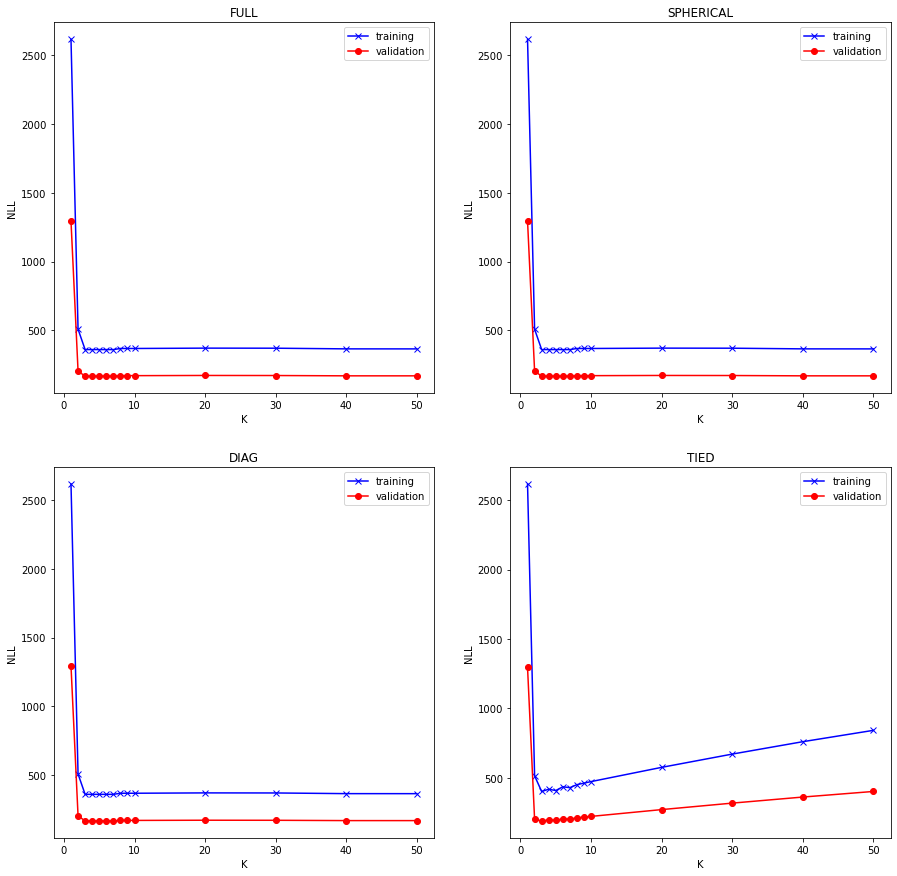

In [234]:
#Create elbow plot

fig,ax = plt.subplots(2, 2, figsize=(15,15))


for i, cov_type in enumerate(cov_types):
    row_num = int(i/2)
    col_num = i%2
    if len(ax.shape) > 1:
        line1 = ax[row_num, col_num].plot(nvals, trainNLL[(0 + (i * 14)):(14 + (i * 14))], 'bx-')
        line2 = ax[row_num, col_num].plot(nvals, validNLL[(0 + (i * 14)):(14 + (i * 14))], 'ro-')
        ax[row_num, col_num].set_xlabel('K')
        ax[row_num, col_num].set_ylabel('NLL')
        ax[row_num, col_num].title.set_text(cov_type.upper())
        ax[row_num, col_num].legend(['training', 'validation'])
    else:
        line1 = ax[col_num].plot(nvals, trainNLL[(0 + (i * 14)):(14 + (i * 14))], 'bx-')
        line2 = ax[col_num].plot(nvals, validNLL[(0 + (i * 14)):(14 + (i * 14))], 'ro-')
        ax[col_num].set_xlabel('K')
        ax[col_num].set_ylabel('NLL')
        ax[col_num].title.set_text(cov_type.upper())
        ax[row_num, col_num].legend(['training', 'validation'])

# plt.figure(0)
# plt.plot(nvalid, trainNLL, 'bx-')
# plt.plot(nvalid, validNLL, 'ro-')
# plt.xlabel('n')
# plt.ylabel('NLL')
# plt.title('Elbow Method For Optimal n')

In [235]:
optimal_LL = validNLL.index(min(validNLL))
hyperparameters = nvalid[optimal_LL].split('-')
print(hyperparameters)
cov_type = cov_types[int(hyperparameters[0])]
n_comp = nvals[int(hyperparameters[1])]
print(cov_type, n_comp)

['1', '6']
spherical 7


In [236]:
model = BayesianGaussianMixture(n_components=n_comp, covariance_type=cov_type, random_state = 1729, max_iter=10000, reg_covar=1e-4)
model.fit(X)
Xn = model.sample(1000)

In [237]:
model.converged_

True

In [238]:
from scipy.stats import ks_2samp

n_samples, n_features = X.shape

for col in range(n_features):
    pvalue = ks_2samp(data1=X[:, col], data2=Xn[0][:, col], alternative='two-sided')
    print(pvalue)


KstestResult(statistic=0.06555030621172353, pvalue=0.01928982801441145)
KstestResult(statistic=0.060308836395450566, pvalue=0.03913126038499686)


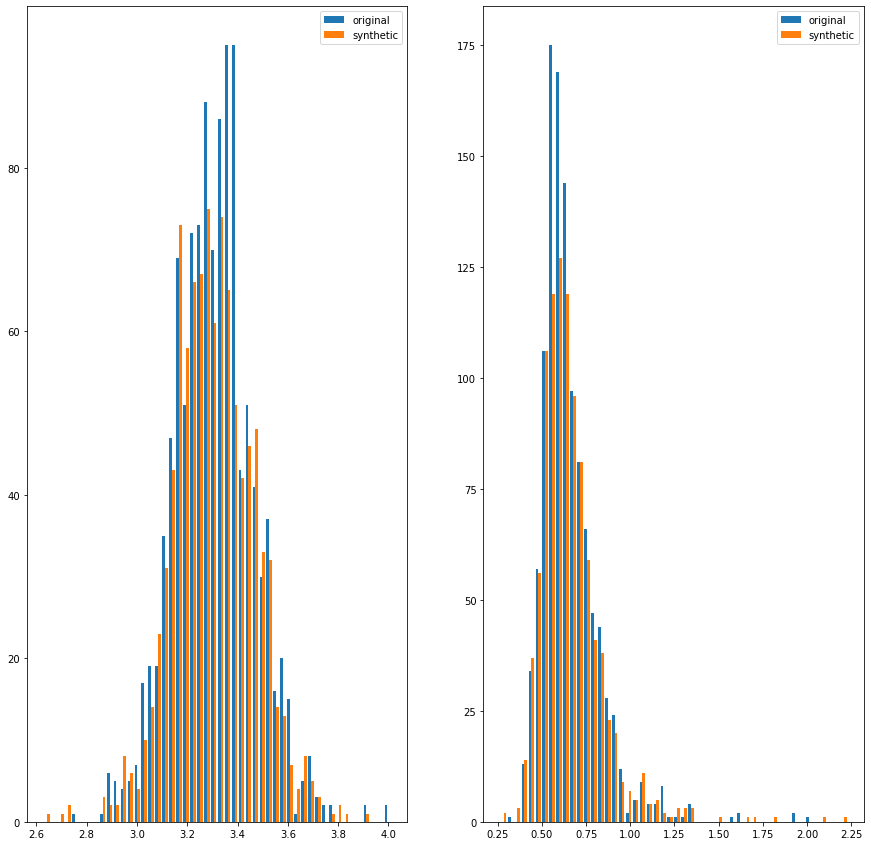

In [242]:
# plotting the distribution of the features using histogram

fig_rows = int(n_features/2) if n_features % 2 == 0 else int(n_features/2 + 1)
fig_columns = 2
bins = 50

fig,ax = plt.subplots(fig_rows, fig_columns, figsize=(15,15))
for feature in range(n_features):
    row_num = int(feature/fig_columns)
    col_num = feature%fig_columns
    if len(ax.shape) > 1:
        ax[row_num, col_num].hist([X[:, feature], Xn[0][:, feature]],
                                  bins=bins,
                                  label=['original', 'synthetic'])
        ax[row_num, col_num].legend(['original', 'synthetic'])

    else:
        ax[col_num].hist([X[:, feature], Xn[0][:, feature]],
                         bins=bins, 
                         label=['original', 'synthetic'])
        ax[col_num].legend(['original', 'synthetic'])



0.0 1.0 0.0 0.0
[[-1.6458782 ]
 [ 0.73942353]
 [ 0.30065977]
 ...
 [ 0.5703887 ]
 [-0.31247244]
 [-0.01847845]]
[[0.10296192]
 [0.30351868]
 [0.38131225]
 ...
 [0.33904916]
 [0.37993388]
 [0.39887418]]


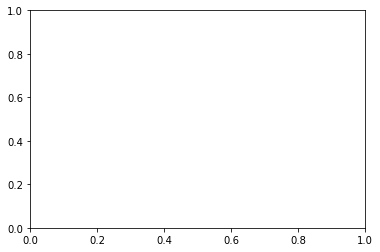

In [44]:
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

mean, var, skew, kurt = norm.stats(moments='mvsk')
print(mean, var, skew, kurt)

scaler = StandardScaler()

scaledX = scaler.fit_transform(original_df["Annual_Premium"].to_numpy().reshape(-1, 1))
print(scaledX)

# x = np.linspace(norm.ppf(0.01),
#                 norm.ppf(0.99), 100)

fig, ax = plt.subplots(1, 1)
# ax.plot(scaledX, norm.pdf(scaledX),
#        'r-', lw=5, alpha=0.6, label='norm pdf')
print(norm.pdf(scaledX))

In [32]:
import math


def hellinger_explicit(p, q):
    """Hellinger distance between two discrete distributions.
       Same as original version but without list comprehension
    """
    list_of_squares = []
    for p_i, q_i in zip(p, q):

        # caluclate the square of the difference of ith distr elements
        print(p_i, q_i)
        s = (math.sqrt(p_i) - math.sqrt(q_i)) ** 2

        # append 
        list_of_squares.append(s)

    # calculate sum of squares
    sosq = sum(list_of_squares)

    return sosq / math.sqrt(2)

hellinger_explicit(original_df["Annual_Premium"].to_numpy(), Xn_df.to_numpy())

2630.0 [82405.57940037]
43327.0 [78206.02798708]
35841.0 [31619.67613926]
27645.0 [34901.04742938]
29023.0 [57549.27247186]
27954.0 [68580.0559382]
2630.0 [58667.34868397]
2630.0 [50284.46563671]
55873.0 [17948.21783872]
27801.0 [57089.42144353]
63623.0 [59650.84237564]
47665.0 [3919.99877587]
25434.0 [58393.52604018]
40044.0 [66484.34508208]
38347.0 [65349.73640787]
33303.0 [61794.67185229]
2630.0 [87248.52637753]
30649.0 [24653.18190539]
35887.0 [32055.30555346]
28333.0 [49200.41285338]
26066.0 [28893.3545283]
2630.0 [52625.0190087]
40987.0 [40735.840906]
38566.0 [31723.74267418]
23450.0 [-13683.15067759]


ValueError: math domain error